In [12]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [32]:
with open(r'C:\Users\223120964.HCAD\OneDrive - GEHealthCare\Desktop\transfer_and_active_learning_plankton_segmentation\logs\GridSearch_3\run_0_learning__rate__0_001__model__backbone__resnet34__model__Unet__freeze__True__weight__decay__0_01__au\epoch_history.json', 'r') as file:
    basic_aug_epochs = json.load(file)    

basic_aug_train_losses, basic_aug_test_losses, basic_aug_test_dices = basic_aug_epochs['train_loss'], basic_aug_epochs['test_loss'], basic_aug_epochs['test_dice']

with open(r'C:\Users\223120964.HCAD\OneDrive - GEHealthCare\Desktop\transfer_and_active_learning_plankton_segmentation\logs\GridSearch_3\run_1_learning__rate__0_001__model__backbone__resnet34__model__Unet__freeze__True__weight__decay__0_01__au\epoch_history.json', 'r') as file:
    occlusion_aug_epochs = json.load(file)    

occlusion_aug_train_losses, occlusion_aug_test_losses, occlusion_aug_test_dices = occlusion_aug_epochs['train_loss'], occlusion_aug_epochs['test_loss'], occlusion_aug_epochs['test_dice']

with open(r'C:\Users\223120964.HCAD\OneDrive - GEHealthCare\Desktop\transfer_and_active_learning_plankton_segmentation\logs\GridSearch_3\run_2_learning__rate__0_001__model__backbone__resnet34__model__Unet__freeze__True__weight__decay__0_01__au\epoch_history.json', 'r') as file:
    occlusion_affine_aug_epochs = json.load(file)    

occlusion_affine_aug_train_losses, occlusion_affine_aug_test_losses, occlusion_affine_aug_test_dices = occlusion_affine_aug_epochs['train_loss'], occlusion_affine_aug_epochs['test_loss'], occlusion_affine_aug_epochs['test_dice']

with open(r'C:\Users\223120964.HCAD\OneDrive - GEHealthCare\Desktop\transfer_and_active_learning_plankton_segmentation\logs\GridSearch_5\run_8_learning__rate__0_0001__model__backbone__resnet34__model__Unet__freeze__True__weight__decay__0_01__a\epoch_history.json', 'r') as file:
    domain_aug_epochs = json.load(file)    

domain_aug_train_losses, domain_aug_test_losses, domain_aug_test_dices = domain_aug_epochs['train_loss'], domain_aug_epochs['test_loss'], domain_aug_epochs['test_dice']

with open(r'C:\Users\223120964.HCAD\OneDrive - GEHealthCare\Desktop\transfer_and_active_learning_plankton_segmentation\logs\GridSearch_5\run_11_learning__rate__0_0001__model__backbone__resnet34__model__Unet__freeze__False__weight__decay__0_01__\epoch_history.json', 'r') as file:
    fda_aug_epochs = json.load(file)    

fda_aug_train_losses, fda_aug_test_losses, fda_aug_test_dices = fda_aug_epochs['train_loss'], fda_aug_epochs['test_loss'], fda_aug_epochs['test_dice']

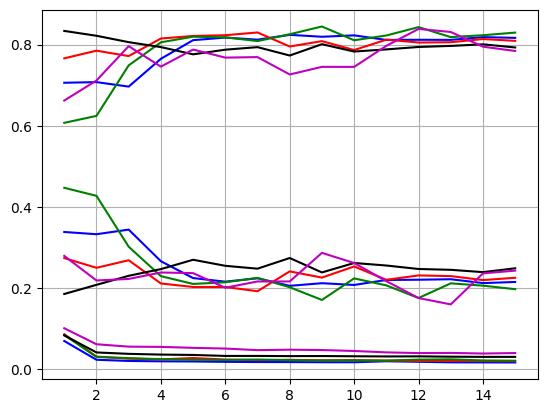

In [33]:
epochs = np.linspace(1, 15, 15)
plt.plot(epochs, basic_aug_train_losses, 'b')
plt.plot(epochs, basic_aug_test_losses, 'b')
plt.plot(epochs, basic_aug_test_dices, 'b')
plt.plot(epochs, occlusion_aug_train_losses, 'r')
plt.plot(epochs, occlusion_aug_test_losses, 'r')
plt.plot(epochs, occlusion_aug_test_dices, 'r')
plt.plot(epochs, occlusion_affine_aug_train_losses, 'g')
plt.plot(epochs, occlusion_affine_aug_test_losses, 'g')
plt.plot(epochs, occlusion_affine_aug_test_dices, 'g')
plt.plot(epochs, domain_aug_train_losses[:15], 'k')
plt.plot(epochs, domain_aug_test_losses[:15], 'k')
plt.plot(epochs, domain_aug_test_dices[:15], 'k')
plt.plot(epochs, fda_aug_train_losses[:15], 'm')
plt.plot(epochs, fda_aug_test_losses[:15], 'm')
plt.plot(epochs, fda_aug_test_dices[:15], 'm')
plt.grid()

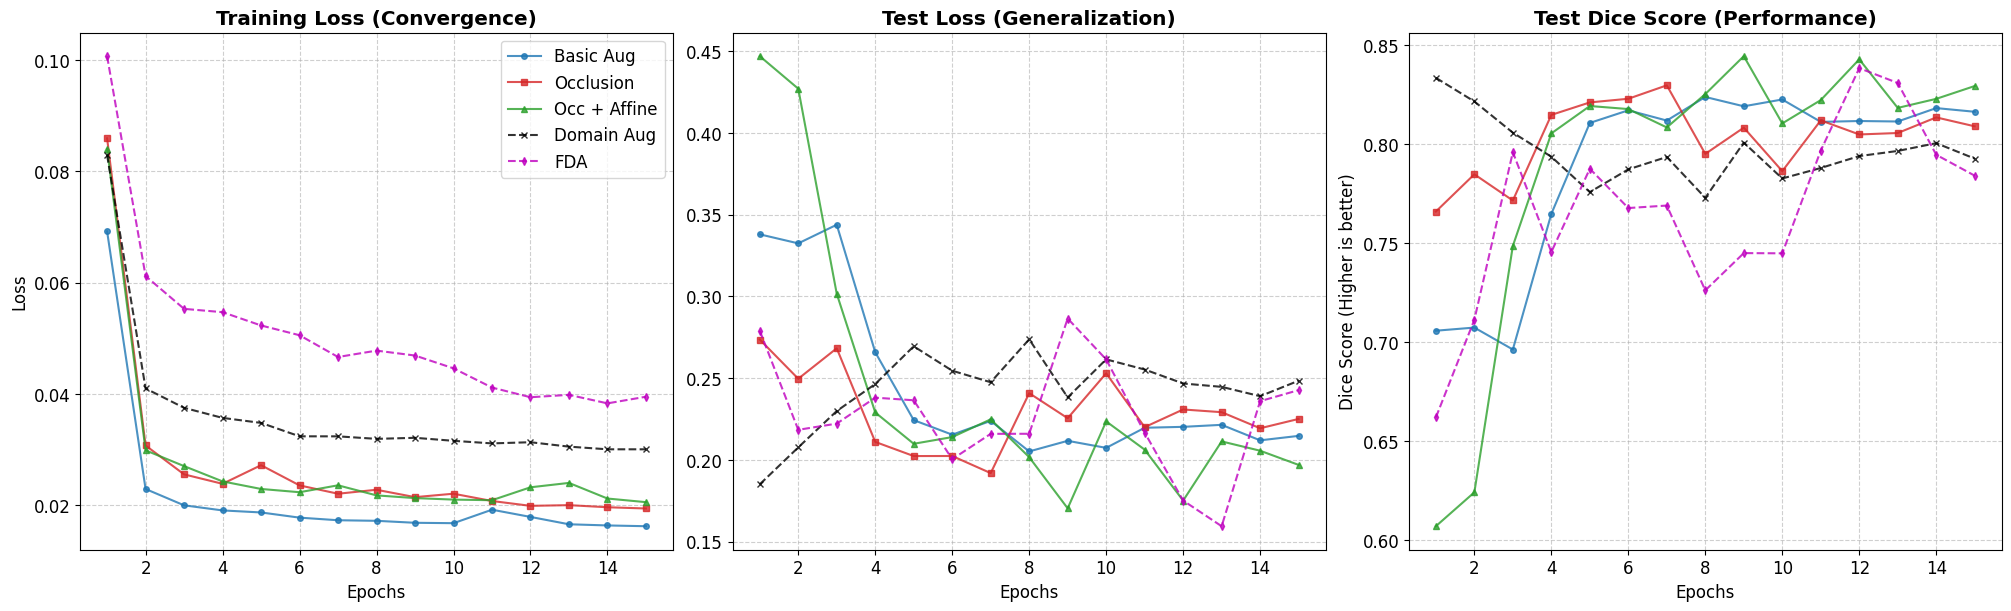

In [ ]:
########################################################
# Clean curves generation coded by Gemini 3 Pro
########################################################

import matplotlib.pyplot as plt
import numpy as np

# Configuration esthétique
plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplots(1, 3, figsize=(20, 6), constrained_layout=True)

# Définition des données pour boucler facilement
# Structure : "Nom": (Train_Loss, Test_Loss, Test_Dice, Couleur, Style)
experiments = {
    "Basic Aug":      (basic_aug_train_losses, basic_aug_test_losses, basic_aug_test_dices, 'tab:blue', 'o-'),
    "Occlusion":      (occlusion_aug_train_losses, occlusion_aug_test_losses, occlusion_aug_test_dices, 'tab:red', 's-'),
    "Occ + Affine":   (occlusion_affine_aug_train_losses, occlusion_affine_aug_test_losses, occlusion_affine_aug_test_dices, 'tab:green', '^-'),
    "Domain Aug":     (domain_aug_train_losses[:15], domain_aug_test_losses[:15], domain_aug_test_dices[:15], 'k', 'x--'),
    "FDA":            (fda_aug_train_losses[:15], fda_aug_test_losses[:15], fda_aug_test_dices[:15], 'm', 'd--')
}

epochs = np.linspace(1, 15, 15)

# --- 1. TRAIN LOSS ---
for name, (tr_l, _, _, col, style) in experiments.items():
    axs[0].plot(epochs, tr_l, style, color=col, label=name, markersize=4, linewidth=1.5, alpha=0.8)

axs[0].set_title("Training Loss (Convergence)", fontweight='bold')
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].grid(True, linestyle='--', alpha=0.6)
axs[0].legend()

# --- 2. TEST LOSS ---
for name, (_, te_l, _, col, style) in experiments.items():
    axs[1].plot(epochs, te_l, style, color=col, label=name, markersize=4, linewidth=1.5, alpha=0.8)

axs[1].set_title("Test Loss (Generalization)", fontweight='bold')
axs[1].set_xlabel("Epochs")
axs[1].grid(True, linestyle='--', alpha=0.6)
# Pas besoin de remettre la légende ici si elle est déjà à gauche

# --- 3. TEST DICE ---
for name, (_, _, te_d, col, style) in experiments.items():
    axs[2].plot(epochs, te_d, style, color=col, label=name, markersize=4, linewidth=1.5, alpha=0.8)

axs[2].set_title("Test Dice Score (Performance)", fontweight='bold')
axs[2].set_xlabel("Epochs")
axs[2].set_ylabel("Dice Score (Higher is better)")
axs[2].grid(True, linestyle='--', alpha=0.6)

# Titre Global

plt.show()
